In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import pathlib
import mapclassify as mc
%matplotlib inline
from datetime import datetime
import bar_chart_race as bcr
import ffmpeg
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import calendar

### Loading shape file

In [2]:
india_shapefile = '../dataset/Shape files/India-State-and-Country-Shapefile-Updated/India_State_Boundary.shp'
map_df = gpd.read_file(india_shapefile)
map_df.head()

State_Name  \
0                         Andaman & Nicobar   
1                                Chandigarh   
2  Daman and Diu and Dadra and Nagar Haveli   
3                                     Delhi   
4                                   Haryana   

                                            geometry  
0  MULTIPOLYGON (((10341718.474 1449533.161, 1034...  
1  POLYGON ((8546255.616 3606050.813, 8546315.400...  
2  MULTIPOLYGON (((8122247.822 2312434.407, 81223...  
3  POLYGON ((8583390.570 3359116.190, 8583476.212...  
4  POLYGON ((8524318.539 3516490.865, 8524451.392...

In [3]:
map_df.at[13, 'State_Name'] = 'Tamil Nadu'
map_df.at[14, 'State_Name'] = 'Chhattisgarh'
map_df.at[15, 'State_Name'] = 'Telangana'

### Visualizing geospatial data for GDP

In [4]:
def get_state_wise_gdp(year, map_df):
    
    gdp_path = "../dataset/GDP/"
    gdp_data = pd.read_csv(gdp_path + 'data.csv')
    
    col = "NSDP Per Capita (Nominal)"
    gdp_col = col+year
    gdp_data = gdp_data[['State Name', gdp_col]]
    gdp_data = gdp_data.rename(columns = {gdp_col : "GDP in Rs", "State Name" : "State_Name"})
    
    gdp_data['GDP in Rs'] = gdp_data['GDP in Rs'].apply(lambda x : str(x[1:].replace(',',''))).astype(str).astype(int)
    
    gdp_data_merged = map_df.merge(gdp_data, on = 'State_Name', how = 'left').fillna(0)
    
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title('State-wise GDP ' + year +' data',
                 fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = gdp_data_merged.plot(column='GDP in Rs', cmap='YlOrRd', linewidth=0.8, edgecolor='0.2',ax=ax,legend=True) # alternative cmap = 'RdYlGn', 'YlOrRd'

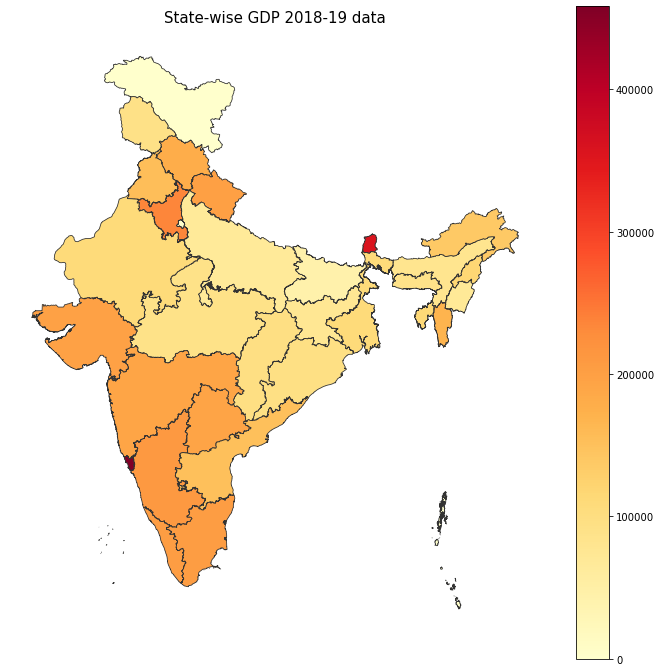

In [6]:
get_state_wise_gdp("2018-19", map_df)

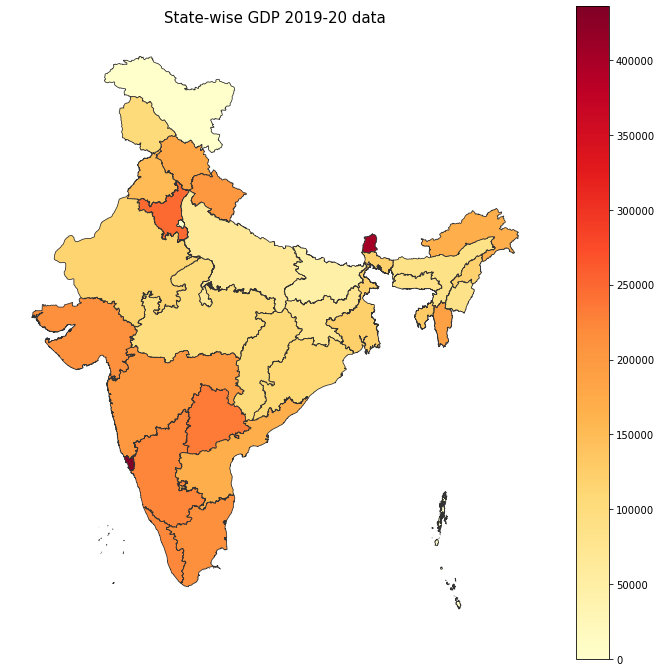

In [5]:
get_state_wise_gdp("2019-20", map_df)

### Understanding growth of GDP of Indian States from 2010 to 2019

In [106]:
gdp_path = "../dataset/GDP/"
gdp_data_main = pd.read_csv(gdp_path + 'data.csv')

In [107]:
def gdp_growth_2010_2019(gdp_data):
    gdp_data['Growth from 2010 to 2019'] = gdp_data['Growth from 2010 to 2019'].apply(lambda x : float(x.replace("%","")))
    
    plt.figure(figsize=(16,15))
    my_cmap = plt.get_cmap("Set2")
    plt.barh(gdp_data['State Name'], gdp_data['Growth from 2010 to 2019'], color = my_cmap.colors, edgecolor='black')
    plt.ylabel("States", fontsize = 10)
    plt.xlabel("GDP growth rate in %", fontsize = 10)
    plt.title(f"GDP Rate % growth from 2010 to 2019")

    growth = gdp_data['Growth from 2010 to 2019']
    states = gdp_data['State Name']
    for bar in range(len(states)):
        x_value = growth[bar]
        y_value = states[bar]
        label_space = 5
        label = str(round(growth[bar],2)) + "%"
        plt.annotate(label, (x_value, y_value), xytext = (label_space, 0), textcoords = "offset points", va = "center", ha = "left")
    

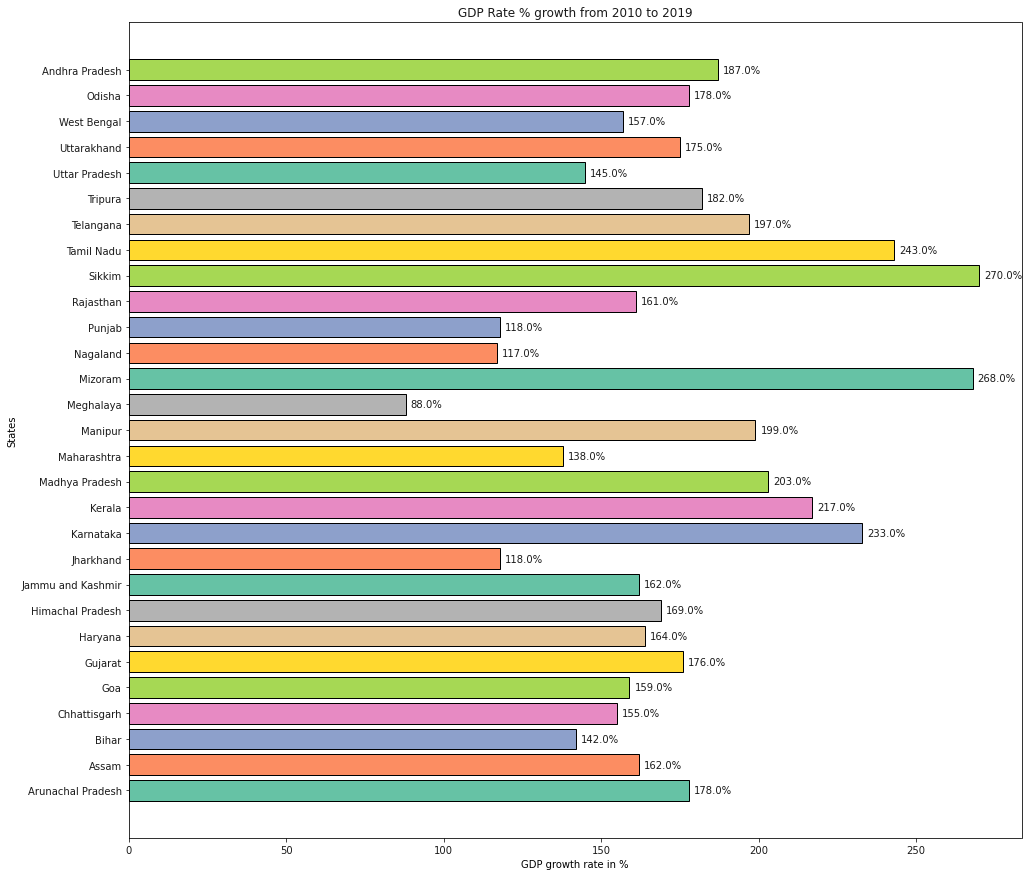

In [108]:
gdp_growth_2010_2019(gdp_data_main)

In [89]:
def get_GDP_bar_chart_race(gdp_data):
    gdp_data_sub = gdp_data[(gdp_data['State Name'] == 'Maharashtra') | (gdp_data['State Name'] == 'Uttar Pradesh') | (gdp_data['State Name'] == 'Bihar') | (gdp_data['State Name'] == 'Tamil Nadu') | (gdp_data['State Name'] == 'Karnataka') | (gdp_data['State Name'] == 'Gujarat') | (gdp_data['State Name'] == 'Madhya Pradesh') | (gdp_data['State Name'] == 'West Bengal') | (gdp_data['State Name'] == 'Telangana') | (gdp_data['State Name'] == 'Himachal Pradesh')]
    gdp_data_sub.set_index(['State Name'], inplace = True)
    
    col = "NSDP Per Capita (Nominal)"
    for i in gdp_data_sub.columns:
        gdp_data_sub = gdp_data_sub.rename(columns = {i : i.replace(col, '')})
    
    gdp_data_bcr = gdp_data_sub.iloc[:, 1:14]
    for i in gdp_data_bcr.columns:
        gdp_data_bcr[i] = gdp_data_bcr[i].apply(lambda x : str(x[1:].replace(',',''))).astype(str).astype(int)
    
    return gdp_data_bcr.T

In [90]:
gdp_data_bcr = get_GDP_bar_chart_race(gdp_data_main)

In [91]:
bcr.bar_chart_race(df=gdp_data_bcr, filename=None, orientation='h', sort='desc', n_bars=None, title="GDP of India States from 1996 to 2020", title_size=None, 
                   bar_label_size=7, tick_label_size=7, shared_fontdict={'family' : 'Consolas', 'color' : '.1'}, 
                   scale='linear')

Lets see how are unemployment rates in Karnataka, Gujarat, Telangana, Tamil Nadu and Maharashtra as they have a good GDP per capita upto 2019

In [6]:
unemployment_path = "../dataset/Unemployment/"

unemployment_df = pd.read_csv(unemployment_path + "Unemployment in India.csv").dropna()
unemployment_df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural

In [151]:
def gdp_unemployment_analysis_2019(unemployment_df):
    unemployment_df['Year'] = pd.to_datetime(unemployment_df[' Date']).dt.strftime('%Y')
    unemployment_year_df = unemployment_df[unemployment_df['Year'] == '2019']
    
    unemployment_stats_2019 = unemployment_year_df[(unemployment_df['Region'] == 'Karnataka') | (unemployment_df['Region'] == 'Gujarat') | (unemployment_df['Region'] == 'Telangana') | (unemployment_df['Region'] == 'Tamil Nadu') | (unemployment_df['Region'] == 'Maharashtra')]
    overall_mean = unemployment_year_df[' Estimated Unemployment Rate (%)'].mean()
    unemployment_stats_grp = unemployment_stats_2019.groupby(['Region'], as_index = False).agg({' Estimated Unemployment Rate (%)' : 'mean'})
    
    my_cmap = plt.get_cmap("Set2")
    plt.axhline(y = overall_mean, linewidth = 3, color = 'red', ls='dotted')
    plt.text(-3.3, 9.2, f'Mean Unemployment Rate : {round(overall_mean,2)}%')
    plt.bar(unemployment_stats_grp['Region'],  unemployment_stats_grp[' Estimated Unemployment Rate (%)'], color = my_cmap.colors, edgecolor='black')
    for bar in range(len(unemployment_stats_grp['Region'])):
        x_value = unemployment_stats_grp['Region'][bar]
        y_value = unemployment_stats_grp[' Estimated Unemployment Rate (%)'][bar]
        label_space = 5
        label = str(round(unemployment_stats_grp[' Estimated Unemployment Rate (%)'][bar],2)) + "%"
        plt.annotate(label, (x_value, y_value), xytext = (label_space, 0), textcoords = "offset points", ha='center', va='bottom')


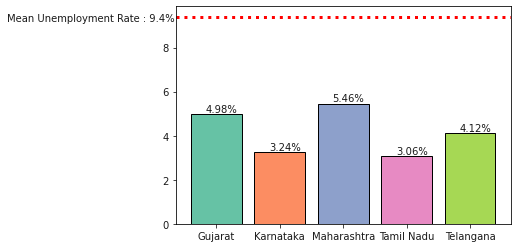

In [152]:
gdp_unemployment_analysis_2019(unemployment_df)

#### We can see that all the states who have a good GDP per capita in 2019 have low unemployment rates than the mean

## Visualizing and Comparing unemployment rates in India before and after covid

### Visualizing and Comparing unemployment rates in various regions of India

In [7]:
unemployment_df_other = pd.read_csv(unemployment_path + "Unemployment_Rate_upto_11_2020.csv").dropna()
unemployment_df_other.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [8]:
def add_region(df,df_region):
    list_of_states = set()

    for state in unemployment_df_other['Region']:
        list_of_states.add(state)

    regions = []
    
    for state in list_of_states:
        region = unemployment_df_other.loc[unemployment_df_other['Region'] == state,'Region.1' ].iloc[0]
        regions.append(region)

    state_region_dict = {}

    i = 0
    for state in list_of_states:
        state_region_dict[state] = regions[i]
        i += 1

    state_region_dict['Chandigarh'] = 'North'

    df1 = df.copy()

    region_column = []

    for state in df1['Region']:
        region = state_region_dict[state]
        region_column.append(region)

    df1['Region_'] = region_column
    
    return state_region_dict, df1

In [9]:
state_region_dict, unemployment_region_df = add_region(unemployment_df,unemployment_df_other)

### These graphs will show us region wise distribution of how the unemployment is present in India in 2019 (precovid) and in 2020 (during covid)

In [15]:
def visualize_region(unemployment_region_df,year):
    unemployment_region_df['Year'] = pd.to_datetime(unemployment_region_df[' Date']).dt.strftime('%Y')
    unemployment_year_df = unemployment_region_df[unemployment_region_df['Year'] == year]
    unemployment_year_grp = unemployment_year_df.groupby(['Region'], as_index = False).agg({' Estimated Unemployment Rate (%)' : 'mean'})
    regions=[]
    for state in unemployment_year_grp['Region']:
        region=state_region_dict[state]
        regions.append(region)
    unemployment_year_grp['Region_']=regions
    figure = px.sunburst(unemployment_year_grp, path=["Region_", "Region"], 
                     values=" Estimated Unemployment Rate (%)", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India in year "+year)
    figure.show()

In [16]:
visualize_region(unemployment_region_df,'2019')

In [17]:
visualize_region(unemployment_region_df,'2020')

In [181]:
def get_unemployment_rate(year, unemployment_df, map_df):
    unemployment_df['Year'] = pd.to_datetime(unemployment_df[' Date']).dt.strftime('%Y')
    unemployment_year_df = unemployment_df[unemployment_df['Year'] == year]
    
    unemployment_year_grp = unemployment_year_df.groupby(['Region'], as_index = False).agg({' Estimated Unemployment Rate (%)' : 'mean'})
    unemployment_year_grouped = map_df.merge(unemployment_year_grp, how = 'left', left_on = 'State_Name', right_on = 'Region').fillna(0)
    
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title('State-wise Unemployment Rate (%) '+ year + ' data',
                 fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = unemployment_year_grouped.plot(column=' Estimated Unemployment Rate (%)', cmap='YlOrRd', linewidth=0.8, edgecolor='0.2', ax=ax, vmin = 0, vmax = 30, legend=True)
    
    

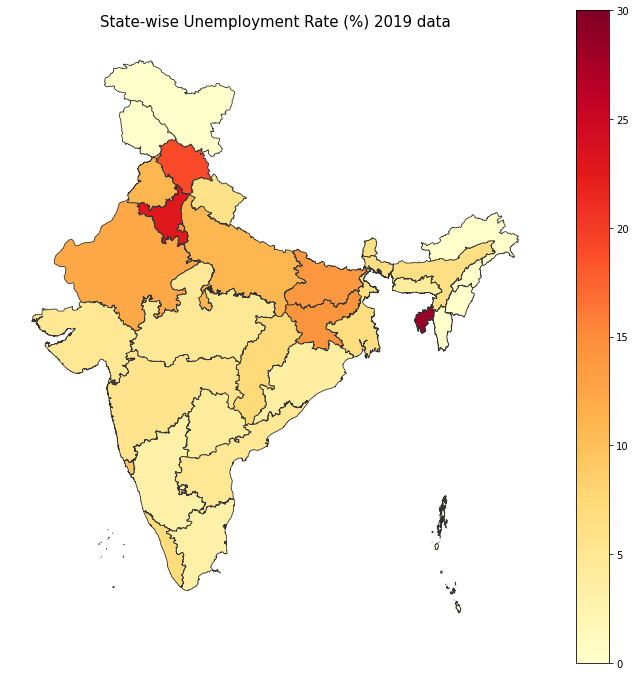

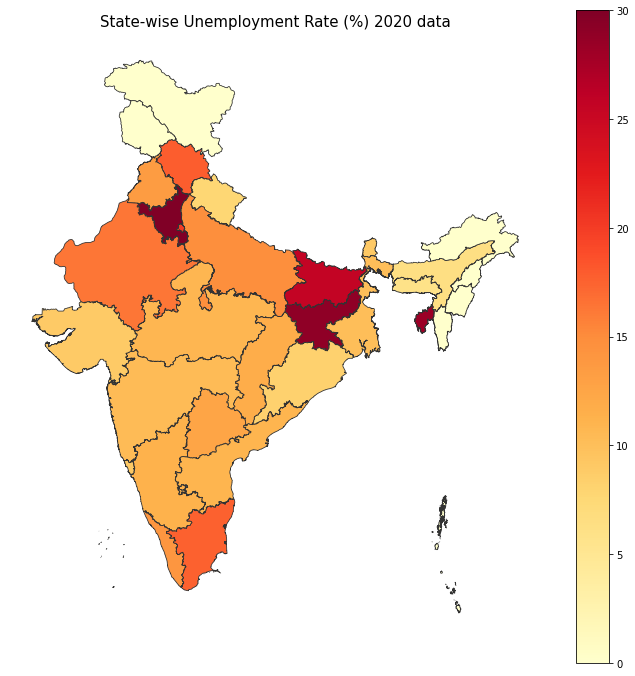

In [182]:
get_unemployment_rate('2019', unemployment_df, map_df)
get_unemployment_rate('2020', unemployment_df, map_df)

### There was a lockdown brought into action in India in the month of march and this animation clearly shows the effect of lockdown on the status of unemployment in India

In [18]:
def get_animation(unemployment_df_other):
    unemployment_df_other1=unemployment_df_other.copy()
    unemployment_df_other1[' Date'] = pd.to_datetime(unemployment_df_other1[' Date'],dayfirst=True)

    unemployment_df_other1['Month'] =  unemployment_df_other1[' Date'].dt.month

    unemployment_df_other1['Month_integer'] = unemployment_df_other1['Month'].apply(lambda x : int(x))

    unemployment_df_other1['Month name'] =  unemployment_df_other1['Month_integer'].apply(lambda x: calendar.month_abbr[x])

    fig = px.scatter_geo(unemployment_df_other1,'longitude', 'latitude', color="Region.1",
                     hover_name="Region", size=" Estimated Unemployment Rate (%)",
                     animation_frame="Month name",scope='asia',template='plotly',title='Impact of lockdown on employement across regions')

    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

    fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed", showocean=True)
    fig.show()
    

In [19]:
get_animation(unemployment_df_other)

In [38]:
def get_unemployment_rate_growth_bar_plot(unemployment_df):
    unemployment_df['Year'] = pd.to_datetime(unemployment_df[' Date']).dt.strftime('%Y')
    
    unemployment_year_df_2019 = unemployment_df[unemployment_df['Year'] == '2019']
    unemployment_year_df_2020 = unemployment_df[unemployment_df['Year'] == '2020']
    
    unemployment_year_grp_2019 = unemployment_year_df_2019.groupby(['Region'], as_index = False).agg({' Estimated Unemployment Rate (%)' : 'mean'})
    unemployment_year_grp_2020 = unemployment_year_df_2020.groupby(['Region'], as_index = False).agg({' Estimated Unemployment Rate (%)' : 'mean'})
    
    growth = unemployment_year_grp_2020[' Estimated Unemployment Rate (%)'] - unemployment_year_grp_2019[' Estimated Unemployment Rate (%)']
    plt.figure(figsize=(15,12))
    my_cmap = plt.get_cmap("Set2")
    
    plt.barh(unemployment_year_grp_2020['Region'], growth, color = my_cmap.colors, edgecolor='black')
    plt.ylabel("States", fontsize = 10)
    plt.xlabel("Unemployment rate in %", fontsize = 10)
    plt.title(f"Unemployment Rate % growth in 2020")
        
    for bar in range(len(unemployment_year_grp_2020['Region'])):
        x_value = growth[bar]
        y_value = unemployment_year_grp_2020['Region'][bar]
        label_space = 5
        label = str(round(growth[bar],2)) + "%"
        plt.annotate(label, (x_value, y_value), xytext = (label_space, 0), textcoords = "offset points", va = "center", ha = "left")
    

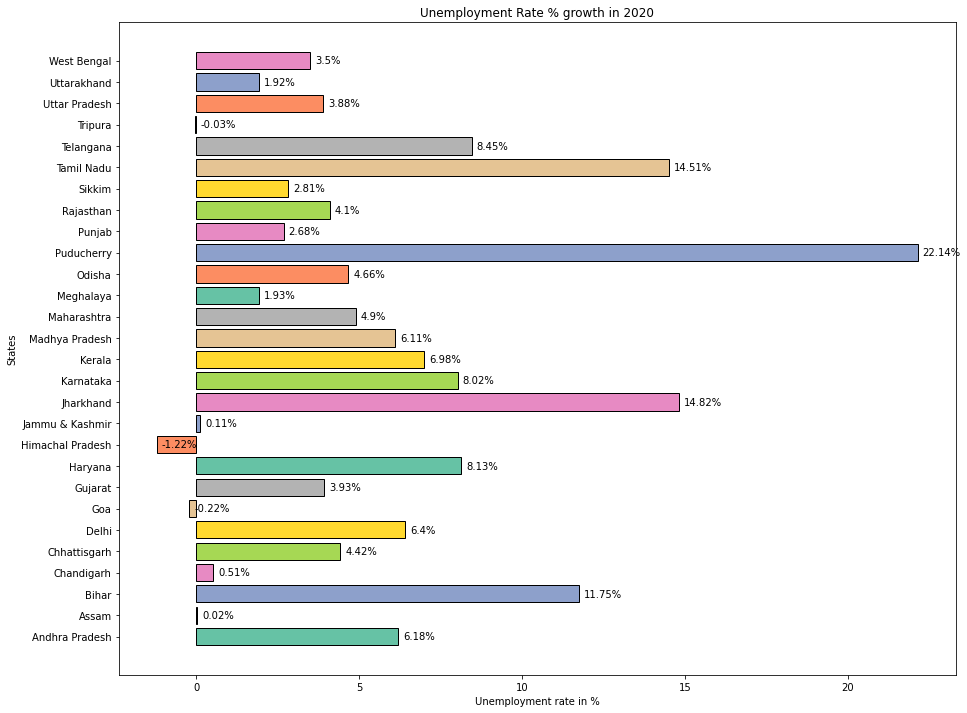

In [40]:
get_unemployment_rate_growth_bar_plot(unemployment_df)

In [185]:
def get_labour_participation_rate(year, unemployment_df, map_df):
    unemployment_df['Year'] = pd.to_datetime(unemployment_df[' Date']).dt.strftime('%Y')
    unemployment_year_df = unemployment_df[unemployment_df['Year'] == year]
    
    unemployment_year_grp = unemployment_year_df.groupby(['Region'], as_index = False).agg({' Estimated Labour Participation Rate (%)' : 'mean'})
    unemployment_year_grouped = map_df.merge(unemployment_year_grp, how = 'left', left_on = 'State_Name', right_on = 'Region').fillna(0)
    
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title('State-wise Labour Participation Rate (%) '+ year + ' data',
                 fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = unemployment_year_grouped.plot(column=' Estimated Labour Participation Rate (%)', cmap='YlOrRd', linewidth=0.8, edgecolor='0.2', ax=ax, vmin = 35, vmax = 50, legend=True)

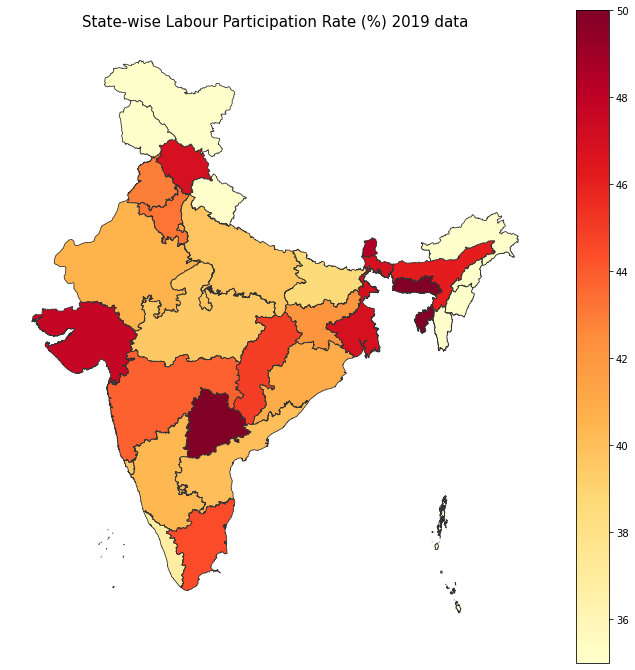

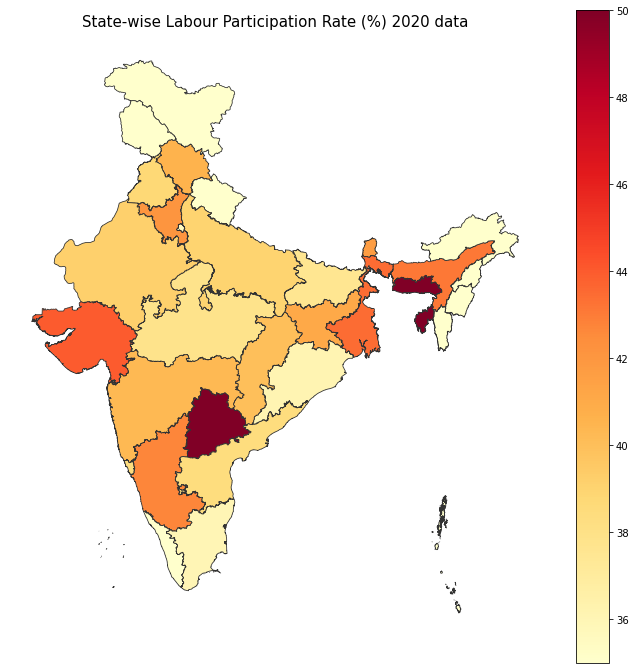

In [186]:
get_labour_participation_rate('2019', unemployment_df, map_df)
get_labour_participation_rate('2020', unemployment_df, map_df)

In [71]:
def get_labour_participation_decline_bar_plot(unemployment_df):
    unemployment_df['Year'] = pd.to_datetime(unemployment_df[' Date']).dt.strftime('%Y')
    
    unemployment_year_df_2019 = unemployment_df[unemployment_df['Year'] == '2019']
    unemployment_year_df_2020 = unemployment_df[unemployment_df['Year'] == '2020']
    
    unemployment_year_grp_2019 = unemployment_year_df_2019.groupby(['Region'], as_index = False).agg({' Estimated Labour Participation Rate (%)' : 'mean'})
    unemployment_year_grp_2020 = unemployment_year_df_2020.groupby(['Region'], as_index = False).agg({' Estimated Labour Participation Rate (%)' : 'mean'})
    
    decline = unemployment_year_grp_2020[' Estimated Labour Participation Rate (%)'] - unemployment_year_grp_2019[' Estimated Labour Participation Rate (%)']
    plt.figure(figsize=(15,12))
    my_cmap = plt.get_cmap("Set2")
    
    plt.barh(unemployment_year_grp_2020['Region'], decline, color = my_cmap.colors, edgecolor='black')
    plt.xlim(-10, 3)
    plt.ylabel("States", fontsize = 10)
    plt.xlabel("Labour Participation rate in %", fontsize = 10)
    plt.title(f"Labour Participation Rate % decline in 2020")
        
    for bar in range(len(unemployment_year_grp_2020['Region'])):
        x_value = decline[bar]
        y_value = unemployment_year_grp_2020['Region'][bar]
        label_space = -5
        label = str(round(decline[bar],2)) + "%"
        plt.annotate(label, (x_value, y_value), xytext = (label_space, 0), textcoords = "offset points", va = "center", ha = "right")
    

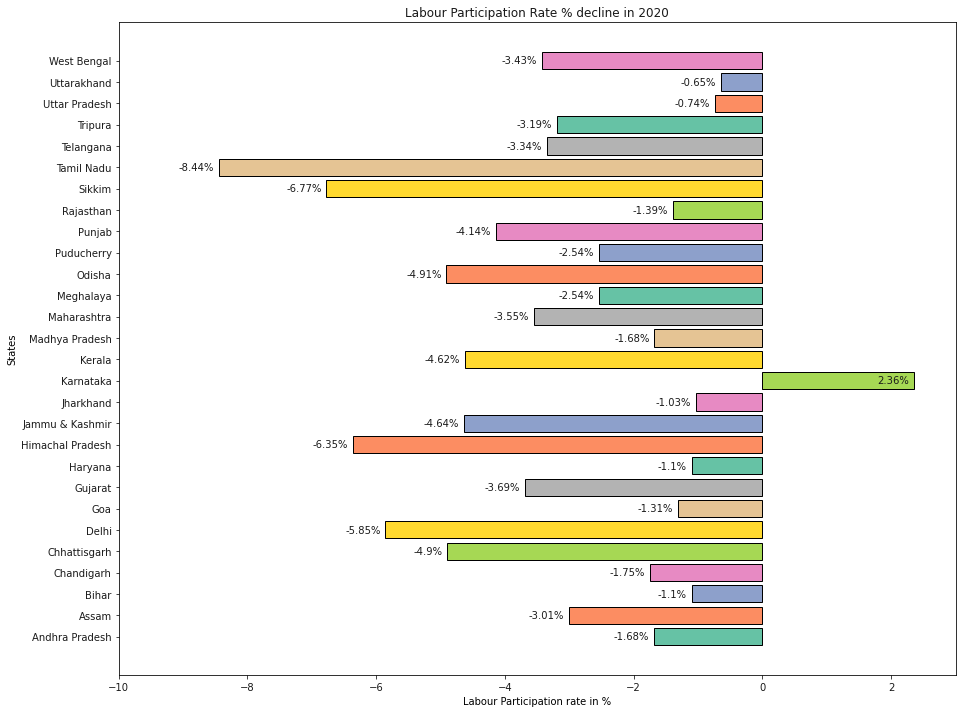

In [72]:
get_labour_participation_decline_bar_plot(unemployment_df)

In [83]:
unemployment_df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  Year  
0           11999139.0                                     43.24  Rural  2019  
1           11755881.0                                     42.05  Rural  2019  
2           12086707.0                                     43.50  Rural  2019  
3           12285693.0                                     43.97  Rural  2019  
4           12256762.0                                     44.68  Rural  2019

In [89]:
unemployment_df_area = unemployment_df.groupby(['Area'], as_index = False).agg({' Estimated Unemployment Rate (%)' : 'mean'})
unemployment_df_area

Area   Estimated Unemployment Rate (%)
0  Rural                         10.324791
1  Urban                         13.166614

In [92]:
labourp_df_area = unemployment_df.groupby(['Area'], as_index = False).agg({' Estimated Labour Participation Rate (%)' : 'mean'})
labourp_df_area

Area   Estimated Labour Participation Rate (%)
0  Rural                                 44.464819
1  Urban                                 40.901365

#### Unemployment rate and Labour Participation rate is almost equal in Rural and Urban areas

### Education analysis

In [217]:
education_path = "../dataset/Education/"
education_data_all = pd.read_csv(education_path + '2015_16_Statewise_Secondary.csv').dropna().reset_index()
education_data = education_data_all[['statname','tot_population','urban_population','sexratio','literacy_rate','male_literacy_rate','female_literacy_rate','schools']]
education_data['statname'] = education_data['statname'].apply(lambda x : x.strip())
education_data.at[12, 'statname'] = 'Madhya Pradesh'
education_data.at[15, 'statname'] = 'Telangana'
education_data

statname  tot_population  urban_population  sexratio  literacy_rate  \
0           Punjab        27704.24             29.82     893.0          76.68   
1      Uttarakhand        10116.75             21.54     963.0          79.63   
2          Haryana        25353.08             24.12     877.0          76.64   
3        Rajasthan        68621.01             19.26     926.0          67.06   
4    Uttar Pradesh       199581.48             17.31     908.0          69.72   
5            Bihar       103804.64              8.36     916.0          63.82   
6        Meghalaya         2964.01             15.32     986.0          75.48   
7            Assam        31169.27             11.03     954.0          73.18   
8      West Bengal        91347.74             24.55     947.0          77.08   
9        Jharkhand        32966.24             18.18     947.0          67.63   
10          Odisha        41947.36             13.15     978.0          73.45   
11    Chhattisgarh        25540.20             16.39     991.0          71.04   
12  Madhya Pradesh        72597.57             21.99     930.0          70.63   
13         Gujarat        60383.63             31.35     918.0          79.31   
14     Maharashtra       112372.97             36.58     925.0          82.91   
15       Telangana        84665.53             24.58     992.0          67.66   
16       Karnataka        61130.70             29.38     968.0          75.60   
17             Goa         1457.72             46.00     968.0          87.40   
18          Kerala        33387.68             24.76    1084.0          93.91   
19      Tamil Nadu        72138.96             38.10     995.0          80.33   

    male_literacy_rate  female_literacy_rate  schools  
0                81.48                 71.34     9171  
1                88.33                 70.70     3512  
2                85.38                 66.77     7663  
3                80.51                 52.66    28195  
4                79.24                 59.26    24569  
5                73.39                 53.33     7627  
6                77.17                 73.78     1555  
7                78.81                 67.27     9062  
8                82.67                 71.16    10194  
9                78.45                 56.21     4601  
10               82.40                 64.36    10745  
11               81.45                 60.59     6283  
12               80.53                 60.02    14893  
13               87.23                 70.73    10942  
14               89.82                 75.48    25025  
15               75.56                 59.74    13823  
16               82.85                 68.13    18136  
17               92.81                 81.84      495  
18               96.02                 91.98     4682  
19               86.81                 73.86    12471

1) Literacy rate and Unemployment Rate %  bar chart
2) Male Female literacy rate and Unemployment Rate %  bar chart

In [208]:
def literacy_rate(education_data):
    literacy_rate_df = education_data[['statname', 'literacy_rate']]
    literacy_rate_df['total'] = 100

    plt.figure(figsize=(15,12))
    my_cmap = plt.get_cmap("Set2")

    plt.barh(literacy_rate_df['statname'], literacy_rate_df['literacy_rate'], color = my_cmap.colors, edgecolor='black', label = 'literacy rate')
    plt.barh(literacy_rate_df['statname'], literacy_rate_df['total'] - literacy_rate_df['literacy_rate'], left = literacy_rate_df['literacy_rate'], color = my_cmap.colors, alpha = 0.3, edgecolor='black')
    plt.ylabel("States", fontsize = 10)
    plt.xlabel("Literacy Rate in %", fontsize = 10)
    plt.title(f"Literacy Rate % in Indian States")

    for bar in range(len(literacy_rate_df['statname'])):
        x_value = literacy_rate_df['literacy_rate'][bar]
        y_value = literacy_rate_df['statname'][bar]
        label1 = str(literacy_rate_df['literacy_rate'][bar]) + "%"
        plt.annotate(label1, (x_value, y_value), xytext = (-20, 0), textcoords = "offset points", va = "center", ha = "right")

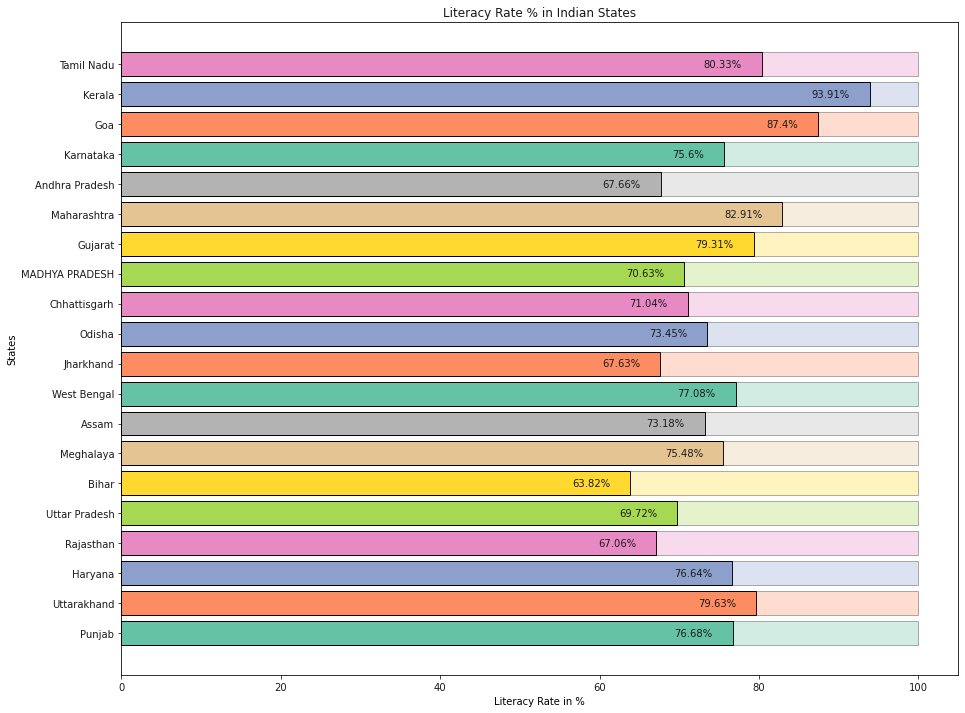

In [209]:
literacy_rate(education_data)

In [210]:
def unemployment_stats(unemployment_df, year):
    unemployment_df['Year'] = pd.to_datetime(unemployment_df[' Date']).dt.strftime('%Y')
    unemployment_year_df = unemployment_df[unemployment_df['Year'] == year]  
    unemployment_year_grp = unemployment_year_df.groupby(['Region'], as_index = False).agg({' Estimated Unemployment Rate (%)' : 'mean'})
    plt.figure(figsize=(15,12))
    my_cmap = plt.get_cmap("Set2")

    plt.barh(unemployment_year_grp['Region'], unemployment_year_grp[' Estimated Unemployment Rate (%)'], color = my_cmap.colors, edgecolor='black')
    plt.ylabel("States", fontsize = 10)
    plt.xlabel("Unemployment rate in %", fontsize = 10)
    plt.title(f"Unemployment Rate % in {year}")

    for bar in range(len(unemployment_year_grp['Region'])):
        x_value = unemployment_year_grp[' Estimated Unemployment Rate (%)'][bar]
        y_value = unemployment_year_grp['Region'][bar]
        label_space = 5
        label = str(round(unemployment_year_grp[' Estimated Unemployment Rate (%)'][bar],2)) + "%"
        plt.annotate(label, (x_value, y_value), xytext = (label_space, 0), textcoords = "offset points", va = "center", ha = "left")


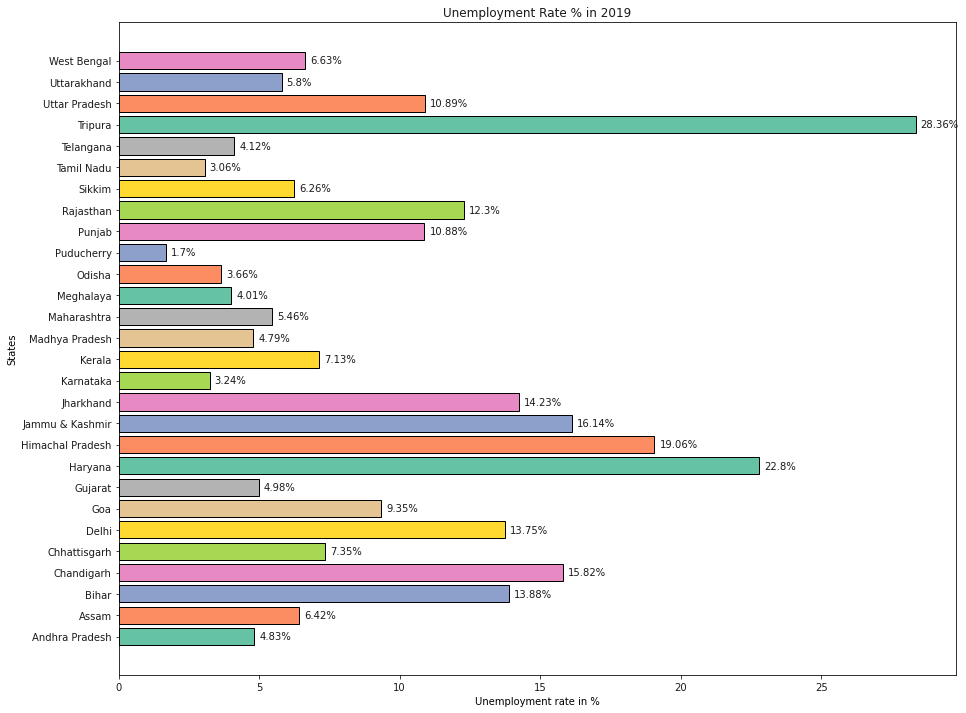

In [211]:
unemployment_stats(unemployment_df, '2019')

In [251]:
def unemployment_literacy_analysis(unemployment_df, education_data, year):
    literacy_rate_df = education_data[['statname', 'literacy_rate']]
    unemployment_df['Year'] = pd.to_datetime(unemployment_df[' Date']).dt.strftime('%Y')
    unemployment_year_df = unemployment_df[unemployment_df['Year'] == year]  
    unemployment_year = unemployment_year_df.groupby(['Region'], as_index = False).agg({' Estimated Unemployment Rate (%)' : 'mean'})
    unemployment_year_grp = unemployment_year.merge(literacy_rate_df, how = 'inner', left_on = 'Region', right_on = 'statname')
    
    plt.figure(figsize=(15,12))
    my_cmap = plt.get_cmap("Set2")
    
    plt.barh(unemployment_year_grp['Region'], unemployment_year_grp[' Estimated Unemployment Rate (%)'], color = my_cmap.colors, edgecolor='black')
    plt.ylabel("States", fontsize = 10)
    plt.xlabel("Unemployment rate in %", fontsize = 10)
    plt.title(f"Unemployment Rate % in {year}")

    for bar in range(len(unemployment_year_grp['Region'])):
        x_value = unemployment_year_grp[' Estimated Unemployment Rate (%)'][bar]
        y_value = unemployment_year_grp['Region'][bar]
        label1 = str(round(unemployment_year_grp[' Estimated Unemployment Rate (%)'][bar],2)) + "%"
        label2 = "Literacy Rate : " + str(unemployment_year_grp['literacy_rate'][bar]) + "%"
        plt.annotate(label1, (x_value, y_value), xytext = (-10, 0), textcoords = "offset points", va = "center", ha = "right")
        plt.annotate(label2, (x_value, y_value), xytext = (5, 0), textcoords = "offset points", va = "center", ha = "left")


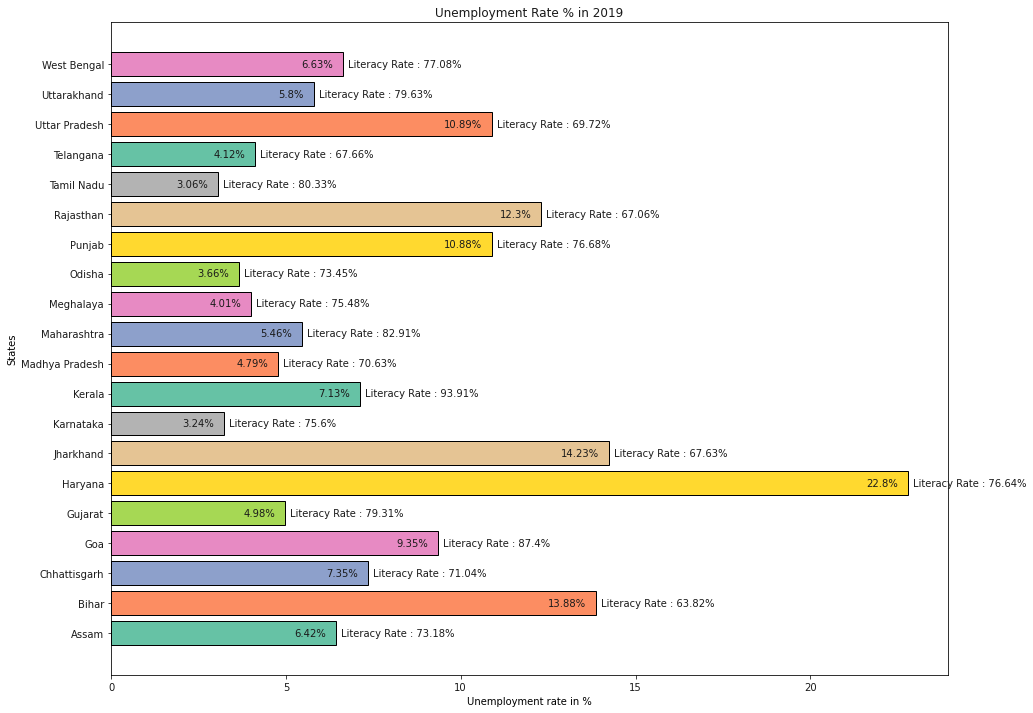

In [252]:
unemployment_literacy_analysis(unemployment_df, education_data, '2019')